In [1]:
%matplotlib inline
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import imageio

from pylab import rcParams
rcParams['figure.figsize'] = 6, 6

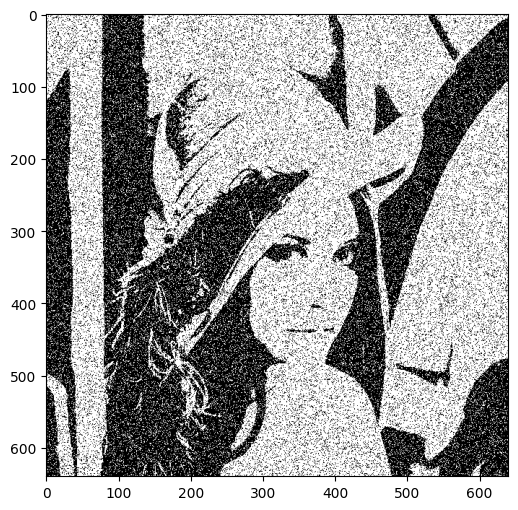

In [2]:
X = np.loadtxt("./figures/lena_noisy.txt")
plt.imshow(X,cmap='gray',vmin=-1,vmax=1)
plt.show()

In [3]:
X # (640, 640)

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1., -1.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1.,  1.],
       ...,
       [ 1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1.,  1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

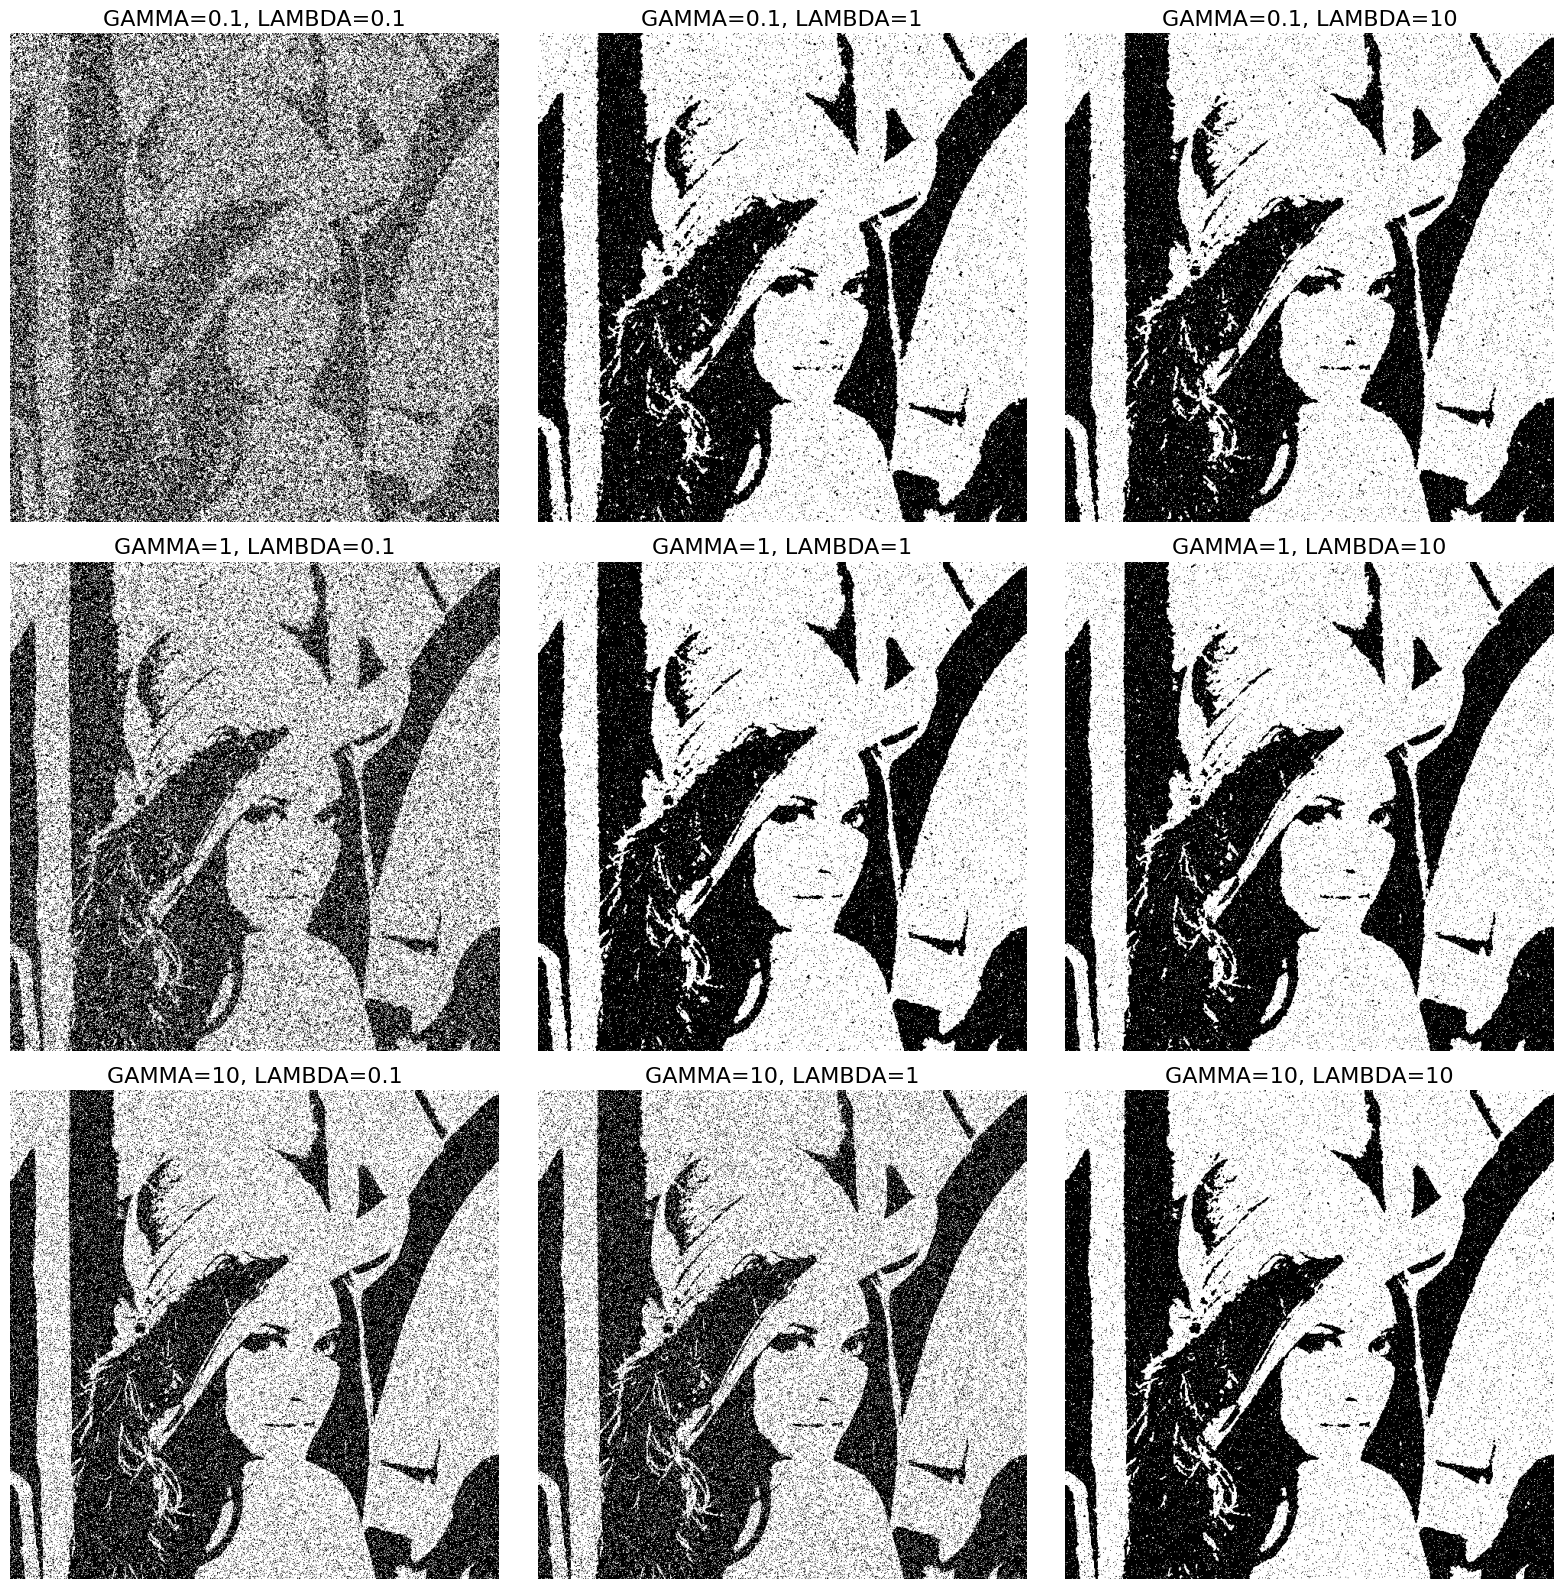

In [5]:
def denoise(X, GAMMA, LAMBDA, T):
    Z = X.copy()  # Initialize Z from X
    for t in range(T):
        i, j = np.random.choice(Z.shape[0]), np.random.choice(Z.shape[1])  # randomly choose a coordinate (i,j)
        delta_E = -GAMMA * X[i, j] * Z[i, j] - LAMBDA * Z[i, j] * (np.sum(Z[max(i-1,0):i+2, max(j-1,0):j+2]) - Z[i, j])
        if np.log(np.random.rand()) < delta_E:
            Z[i, j] = -Z[i, j]
    return Z

T = int(5e5)
# List of values for GAMMA and LAMBDA
gamma_values = [0.1,1, 10]
lambda_values = [0.1,1,10]

# Create subplots
n = len(gamma_values) * len(lambda_values)
fig, ax = plt.subplots(len(gamma_values), len(lambda_values), figsize=(16, 16))

# Iterate through different values of GAMMA and LAMBDA
for i, GAMMA in enumerate(gamma_values):
    for j, LAMBDA in enumerate(lambda_values):
        Z = denoise(X, GAMMA, LAMBDA, T)  # Perform denoising
        ax[i, j].imshow(Z, cmap='gray', vmin=-1, vmax=1)
        ax[i, j].set_title(f"GAMMA={GAMMA}, LAMBDA={LAMBDA}", fontsize=16)
        ax[i, j].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


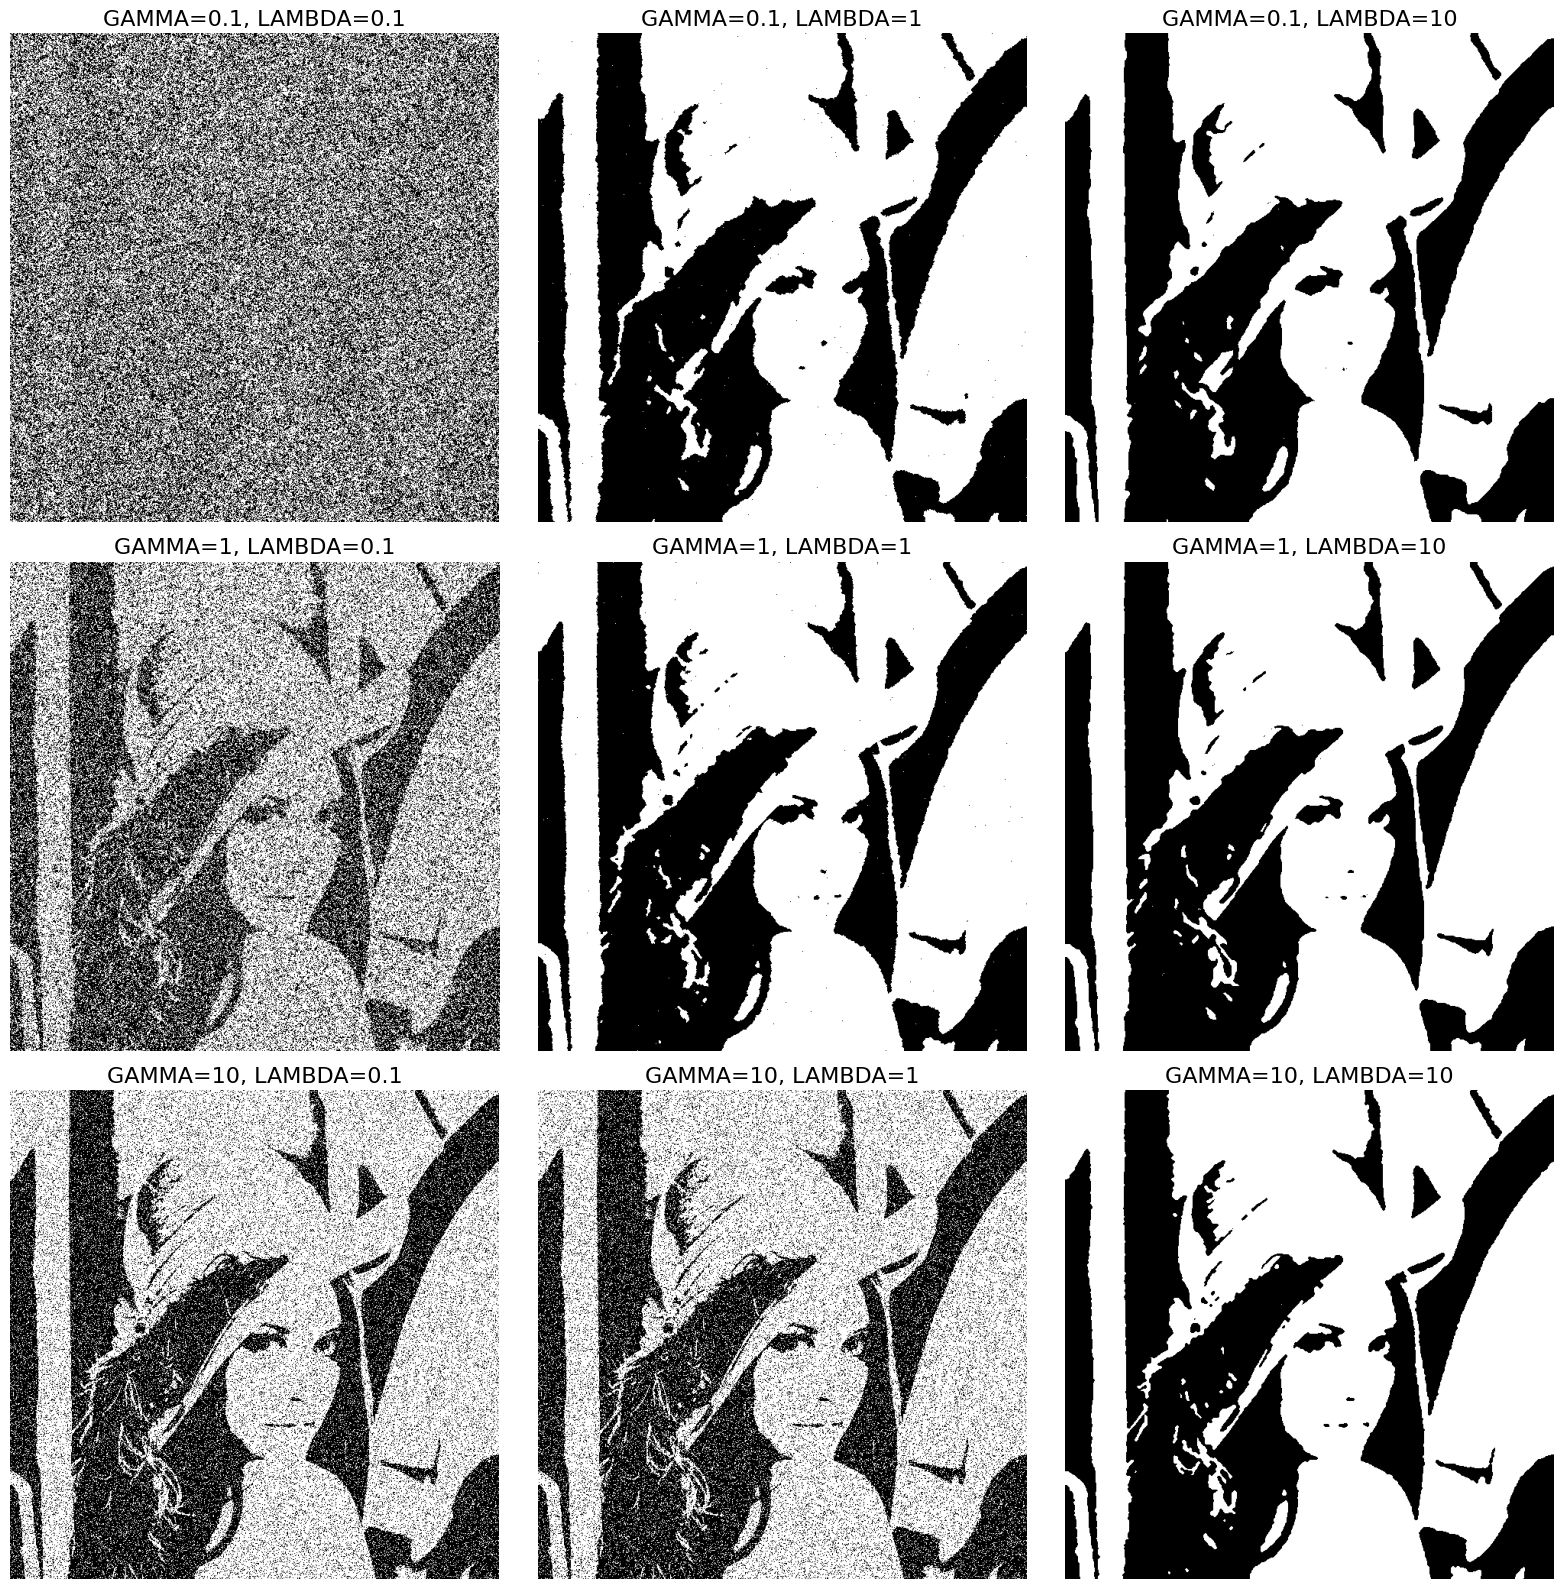

In [8]:
fig, ax = plt.subplots(len(gamma_values), len(lambda_values), figsize=(16, 16))
T = int(5e6)
for i, GAMMA in enumerate(gamma_values):
    for j, LAMBDA in enumerate(lambda_values):
        Z = denoise(X, GAMMA, LAMBDA, T)  # Perform denoising
        ax[i, j].imshow(Z, cmap='gray', vmin=-1, vmax=1)
        ax[i, j].set_title(f"GAMMA={GAMMA}, LAMBDA={LAMBDA}", fontsize=16)
        ax[i, j].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# g(x|y) = U(y-n,y+n)
def draw_y(x, n, max_val=639):
    lower_bound = x - n
    upper_bound = x + n
    
    if upper_bound <= max_val and lower_bound >= 0:
        # If both bounds are within the range
        y = np.random.randint(lower_bound, upper_bound + 1)
    elif upper_bound > max_val:
        # If upper_bound exceeds max_val, handle the wrap-around
        upper_mod = upper_bound % (max_val + 1)
        range1 = list(range(0, upper_mod + 1))
        range2 = list(range(lower_bound, max_val + 1))
        combined_range = range1 + range2
        y = np.random.choice(combined_range)
    elif lower_bound < 0:
        # If lower_bound is less than 0, handle the wrap-around
        lower_mod = (lower_bound + (max_val + 1)) % (max_val + 1)
        range1 = list(range(lower_mod, max_val + 1))
        range2 = list(range(0, upper_bound + 1))
        combined_range = range1 + range2
        y = np.random.choice(combined_range)
    
    return y

def denoise2(X, GAMMA, LAMBDA, T, n):
    Z = X.copy()  # Initialize Z from X
    i, j = np.random.choice(X.shape[0]), np.random.choice(X.shape[1])
    for t in range(T):
        i, j = draw_y(i, n), draw_y(j, n)  # randomly choose a coordinate (i,j)
        delta_E = -GAMMA * X[i, j] * Z[i, j] - LAMBDA * Z[i, j] * (np.sum(Z[max(i-1,0):i+2, max(j-1,0):j+2]) - Z[i, j])
        if np.log(np.random.rand()) < delta_E:
            Z[i, j] = -Z[i, j]
    return Z


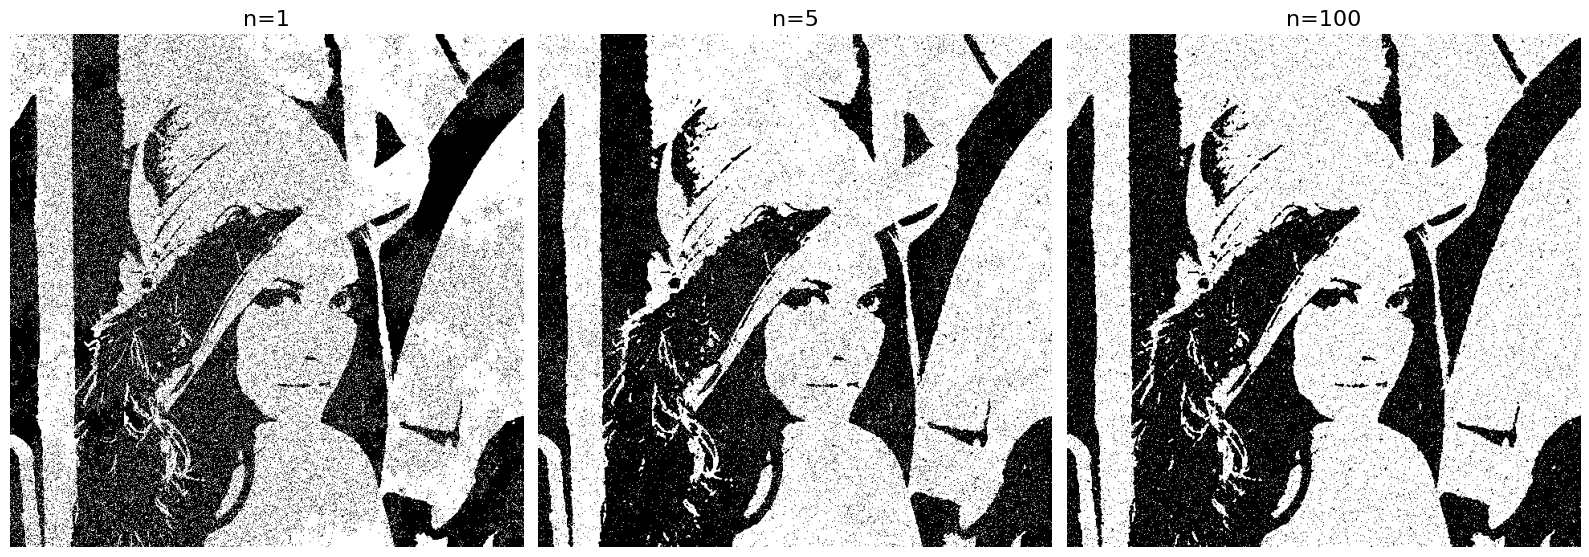

In [10]:
ns = [1,5,100]
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

# Iterate through different values of GAMMA and LAMBDA
for j, n in enumerate(ns):
    Z = denoise2(X, 10, 10, int(5e5), n)  # Perform denoising
    ax[j].imshow(Z, cmap='gray', vmin=-1, vmax=1)
    ax[j].set_title(f"n={n}", fontsize=16)
    ax[j].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
# g(x|y) = N(y,sigma^2)
def draw_y_gaussian(x, max_val=639, sigma=1):
        # Draw from a Gaussian distribution centered at x with standard deviation sigma
    y = int(np.random.normal(loc=x, scale=sigma))
    
    # Adjust for boundaries
    if y < 0:
        y = (y + max_val + 1) % (max_val + 1)
    elif y > max_val:
        y = y % (max_val + 1)
    
    return y
def denoise3(X, GAMMA, LAMBDA, T, s):
    Z = X.copy()  # Initialize Z from X
    i, j = np.random.choice(X.shape[0]), np.random.choice(X.shape[1])
    for t in range(T):
        i, j = draw_y_gaussian(i, sigma=s), draw_y_gaussian(j, sigma=s)  # randomly choose a coordinate (i,j)
        delta_E = -GAMMA * X[i, j] * Z[i, j] - LAMBDA * Z[i, j] * (np.sum(Z[max(i-1,0):i+2, max(j-1,0):j+2]) - Z[i, j])
        if np.log(np.random.rand()) < delta_E:
            Z[i, j] = -Z[i, j]
    return Z

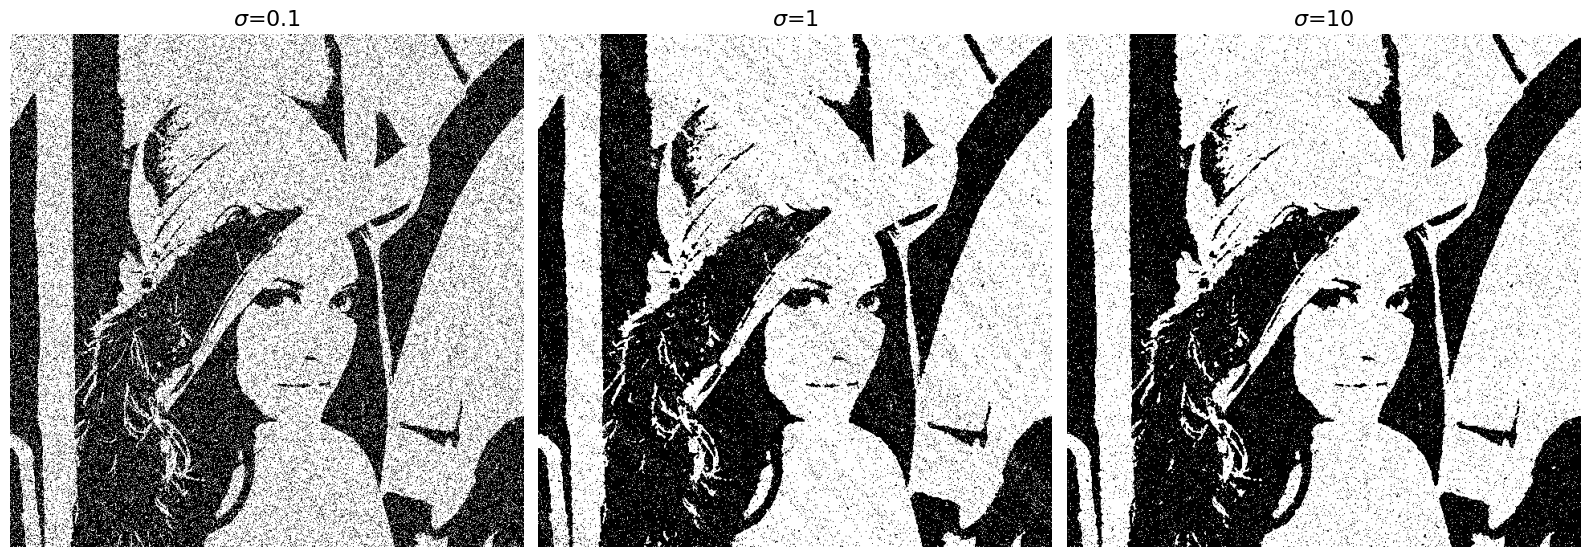

In [12]:
sigmas = [0.1,1,10]
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

# Iterate through different values of GAMMA and LAMBDA
for j, s in enumerate(sigmas):
    Z = denoise3(X, 10, 10, int(5e5), s)  # Perform denoising
    ax[j].imshow(Z, cmap='gray', vmin=-1, vmax=1)
    ax[j].set_title(rf"$\sigma$={s}", fontsize=16)
    ax[j].axis('off')

# Show the plot
plt.tight_layout()
plt.show()